File created by Jinghao Chen (jinghc2@uci.edu).

Import necessary packages.

In [1]:
import pickle
import torch
import mptools as mp
import numpy as np
# np.random.seed(114514)

Load combined data from repository "/data".

In [2]:
pickle_in = open("data/data_comb.pkl","rb")
data_comb = pickle.load(pickle_in)

Shuffle and classified data into customized ordinal bins.

In [3]:
X, Y = data_comb[:,:-1], data_comb[:,-1]   # get features & target
X, Y = mp.shuffleData(X,Y)       # reorder randomly rather than by class label

In [4]:
Xtr, Ytr = X, Y
Ytr[Y<=3] = 0
Ytr[(Y>3)&(Y<=6)] = 1
Ytr[Y>6] = 2

In [5]:
Nc = len(set(Ytr)) # number of class(es)
Nc

3

Calculate necessary values.

In [6]:
N_comb = data_comb.shape[1]

In [7]:
N_theta = Nc-1+3 + N_comb-1 # the number of unknown parameters

Initialize $\theta$.

In [8]:
theta_ini = np.array([.2,.8,.06,.5,-3.26]+[0]*(N_comb-1)).reshape(N_theta,1) 

Train the classifier to jointly learn $\theta$.

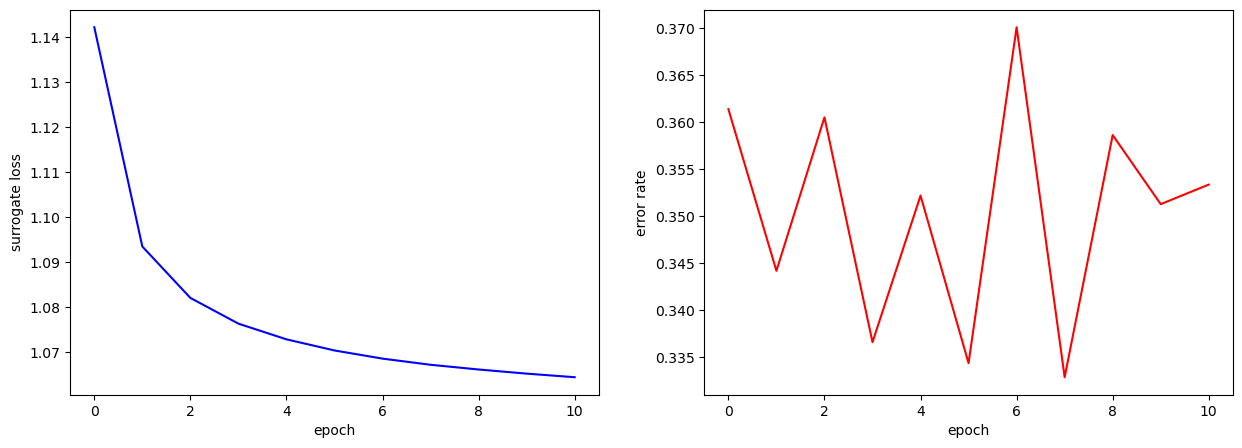

In [9]:
learner = mp.jointClassifierMC()
learner.classes = np.unique(Ytr)
learner.theta = torch.tensor(theta_ini,requires_grad = True,dtype=torch.float32) # TODO
learner.train(Xtr,Ytr,initStep=2e-1,stopTol=1e-4,stopEpochs=10,alpha=10,plotOpt=True);

First 4 values are reference and maximal transcription rates in ratio $\frac{\bar{\tau}}{\tau_{max}}$, concentration of CRP $C_c$, concentration of RNAP $C_r$ and CRP-RNAP interaction energy $\varepsilon_i$.

In [10]:
theta_np = learner.theta.detach().numpy()
theta_np[:5] # value after 50 epochs

array([[ 4.5303339e-03],
       [ 9.5793867e-01],
       [ 2.6250359e-01],
       [ 5.6271082e-01],
       [-7.1210995e+00]], dtype=float32)

Save it if needed.

In [16]:
# pickle_out = open("data/theta230809joint3classes.pkl","wb")
# pickle.dump(theta_np, pickle_out)
# pickle_out.close()

Plot the energy matrix for CRP, display energy shift and unit.

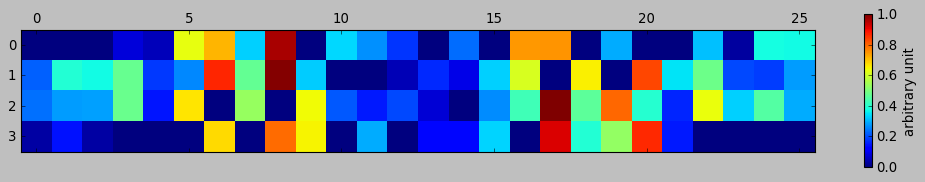

In [12]:
theta_c,_,shift_c,scale_c = mp.energyMatrix(theta_np[5:5+104],plot = True)

In [13]:
shift_c, scale_c

(-11.45784755423665, 4.3495083)

Now we turn to RNAP.

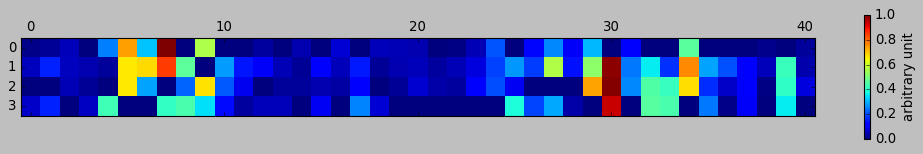

In [14]:
theta_r,_,shift_r,scale_r = mp.energyMatrix(theta_np[5+104:],plot = True)

In [15]:
shift_r, scale_r

(-29.212896671146154, 7.3576126)